# Penn Courses Analysis - Data Analysis

In [17]:
import pandas as pd

# read in data
courses_df = pd.read_csv('data/penn-course-data.csv')
print(f'Data has {len(courses_df)} courses')
courses_df.head()

Data has 8698 courses


,code,Course Quality,Instructor Quality,Difficulty,Work Required,Amount Learned,Communication Ability,Instructor Access,Readings Value,Rec. Major,Rec. Nonmajor,Stimulate Interest,num_students,Ta Quality,Abilities Challenged,Class Pace,Instructor Effective,Native Ability
0,ACCT-021,2.620000,2.810000,2.620000,2.710000,2.750000,2.810000,2.810000,2.650000,3.100000,2.190000,2.380000,22.000000,NaN,NaN,NaN,NaN,NaN
1,ACCT-022,3.080000,3.130000,2.970000,3.060000,3.190000,3.110000,3.040000,2.880000,3.520000,2.620000,2.750000,14.333333,NaN,NaN,NaN,NaN,NaN
2,ACCT-028,2.850000,2.920000,3.380000,3.230000,3.000000,3.000000,3.230000,2.750000,3.080000,2.000000,3.000000,14.000000,NaN,NaN,NaN,NaN,NaN
3,ACCT-1010,2.348155,2.574466,2.769515,2.293689,2.576117,2.563981,2.578155,2.065534,2.919515,2.068738,2.251845,66.000000,2.323906,NaN,NaN,NaN,NaN
4,ACCT-1020,2.233385,2.604615,2.502615,2.092615,2.309846,2.621846,2.678462,1.995231,2.473385,1.482769,2.344769,72.000000,2.505455,NaN,NaN,NaN,NaN


## Data Cleaning

In [18]:
# snake case all column names

col_mapping = {}
for col in courses_df.columns:
    cleaned_colname = col.replace('.', '').replace(' ', '_').lower()
    col_mapping[col] = cleaned_colname

courses_df.rename(columns=col_mapping, inplace=True)

In [19]:
# drop columns that are not useful
drop_cols = []
impute_cols = []
for col in courses_df.columns:
    num_missing = courses_df[col].isna().sum()
    print(f'{col} has {num_missing} NaN values')
    if num_missing > 1000:
        # drop columns with more than 1000 missing values
        drop_cols.append(col)
    elif num_missing > 0:
        impute_cols.append(col)


courses_df.drop(columns=drop_cols, inplace=True)

code has 0 NaN values
course_quality has 0 NaN values
instructor_quality has 0 NaN values
difficulty has 0 NaN values
work_required has 0 NaN values
amount_learned has 1719 NaN values
communication_ability has 25 NaN values
instructor_access has 25 NaN values
readings_value has 1643 NaN values
rec_major has 1722 NaN values
rec_nonmajor has 1721 NaN values
stimulate_interest has 27 NaN values
num_students has 382 NaN values
ta_quality has 3747 NaN values
abilities_challenged has 8321 NaN values
class_pace has 8321 NaN values
instructor_effective has 8321 NaN values
native_ability has 8321 NaN values


As seen above, all courses have course_quality, instructor_quality, difficulty, and work_required ratings. Given that very few courses have data for ta_quality, abilities_challenged, class_pace, instructor_effective, and native_ability, these columns will be dropped. The amount_learned, readings_value, rec_major, and rec_nonmajor columns also have a significant amount of missing data. This is likely because different schools ask different questions in the course evals; these columns will also be dropped.

For the columns communication_ability, instructor_access, stimulate_interest, and num_students, we can impute the missing values by filling them in with the average.

In [23]:
for col in impute_cols:
    mean = courses_df[col].mean()
    courses_df[col].fillna(mean, inplace=True)

courses_df.isna().sum()

code                     0
course_quality           0
instructor_quality       0
difficulty               0
work_required            0
communication_ability    0
instructor_access        0
stimulate_interest       0
num_students             0
dtype: int64

We can also add a column for course_level and department by parsing the course_code

In [40]:
import re

def get_course_level(code):
  course_num = int(re.sub('\D', '', code))
  if course_num < 1000:
    return int(course_num / 100)
  else:
    return int(course_num / 1000)
  
def get_department(code):
  return code.split('-')[0]

courses_df['course_level'] = courses_df['code'].apply(get_course_level)
courses_df['department'] = courses_df['code'].apply(get_department)
courses_df.head()

,code,course_quality,instructor_quality,difficulty,work_required,communication_ability,instructor_access,stimulate_interest,num_students,course_level,department
0,ACCT-021,2.620000,2.810000,2.620000,2.710000,2.810000,2.810000,2.380000,22.000000,0,ACCT
1,ACCT-022,3.080000,3.130000,2.970000,3.060000,3.110000,3.040000,2.750000,14.333333,0,ACCT
2,ACCT-028,2.850000,2.920000,3.380000,3.230000,3.000000,3.230000,3.000000,14.000000,0,ACCT
3,ACCT-1010,2.348155,2.574466,2.769515,2.293689,2.563981,2.578155,2.251845,66.000000,1,ACCT
4,ACCT-1020,2.233385,2.604615,2.502615,2.092615,2.621846,2.678462,2.344769,72.000000,1,ACCT


## Exploratory Data Analysis

With our data cleaned, we can begin some exploratory data analysis :)

In [43]:
courses_df.describe()

,course_quality,instructor_quality,difficulty,work_required,communication_ability,instructor_access,stimulate_interest,num_students,course_level
count,8698.000000,8698.000000,8698.000000,8698.000000,8698.000000,8698.000000,8698.000000,8698.000000,8698.000000
mean,3.045939,3.259252,2.384150,2.485612,3.244634,3.327404,3.115243,21.328170,2.991147
std,0.457467,0.434853,0.486705,0.512314,0.440628,0.390271,0.504008,24.996629,1.960584
min,0.000000,0.400000,0.000000,0.000000,0.380000,1.000000,0.000000,1.000000,0.000000
25%,2.775000,3.000000,2.090000,2.190000,3.000000,3.100357,2.805000,9.000000,1.000000
50%,3.062019,3.290000,2.370000,2.500000,3.290000,3.365000,3.160000,14.400000,3.000000
75%,3.360000,3.570000,2.700000,2.810000,3.550000,3.600000,3.485000,22.000000,5.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,451.000000,9.000000


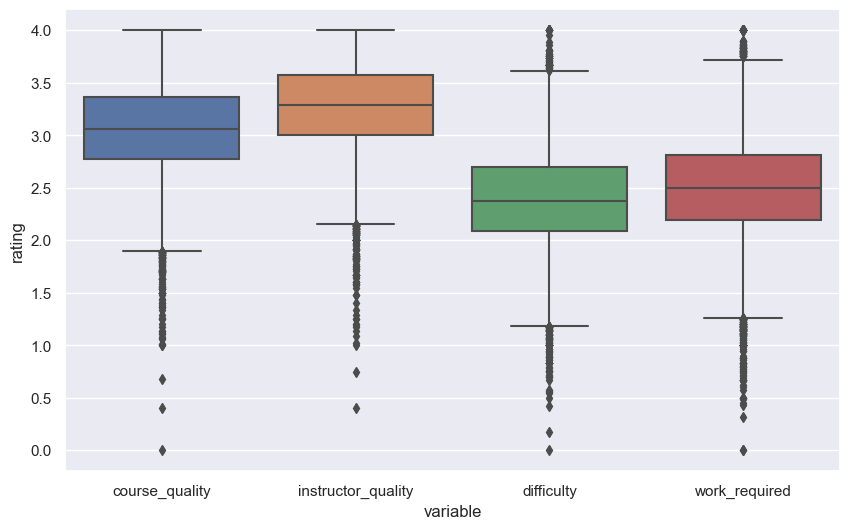

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

data = courses_df[['course_quality', 'instructor_quality', 'difficulty', 'work_required']]
sns.set(rc={'figure.figsize':(10, 6)})
ax = sns.boxplot(x='variable', y='value', data=pd.melt(data))
ax.set(xlabel='variable', ylabel='rating')
plt.show()

In [42]:
print('Highest quality courses')
courses_df.nlargest(10, 'course_quality')

Highest quality courses


,code,course_quality,instructor_quality,difficulty,work_required,communication_ability,instructor_access,stimulate_interest,num_students,course_level,department
32,AFRC-0100,4.0,4.0,2.00,2.25,4.00,4.00,4.0,4.00000,1,AFRC
164,AFRC-3173,4.0,4.0,2.50,2.88,3.88,4.00,4.0,21.32817,3,AFRC
183,AFRC-3561,4.0,4.0,2.00,1.50,4.00,4.00,4.0,4.00000,3,AFRC
293,ANCH-261,4.0,4.0,1.75,2.75,4.00,4.00,4.0,4.00000,2,ANCH
294,ANCH-302,4.0,4.0,1.75,2.25,4.00,3.75,4.0,5.00000,3,ANCH
296,ANCH-305,4.0,4.0,2.00,1.67,4.00,3.67,4.0,4.00000,3,ANCH
317,ANCH-534,4.0,4.0,2.00,2.00,4.00,4.00,4.0,7.00000,5,ANCH
320,ANCH-538,4.0,4.0,3.00,4.00,4.00,4.00,4.0,4.00000,5,ANCH
460,ANTH-2145,4.0,4.0,3.50,2.50,4.00,4.00,4.0,3.00000,2,ANTH
466,ANTH-224,4.0,3.5,2.00,3.00,3.50,4.00,4.0,7.00000,2,ANTH


In [44]:
print('Most difficult courses')
courses_df.nlargest(10, 'difficulty')

Most difficult courses


,code,course_quality,instructor_quality,difficulty,work_required,communication_ability,instructor_access,stimulate_interest,num_students,course_level,department
235,AFRC-548,3.775,3.625,4.00,1.575,3.00,3.765,3.90,3.0,5,AFRC
1880,CLST-509,2.670,3.670,4.00,4.000,3.33,4.000,3.00,2.0,5,CLST
4937,IPD-500,4.000,3.625,4.00,4.000,4.00,4.000,4.00,9.0,5,IPD
5787,MSE-5970,3.500,3.500,4.00,4.000,3.00,3.000,3.00,1.0,5,MSE
5791,MTHS-3000,3.500,4.000,4.00,3.000,4.00,1.330,2.67,12.0,3,MTHS
6205,NELC-275,3.500,3.500,4.00,3.500,4.00,3.000,4.00,3.0,2,NELC
6975,PHYL-2300,3.500,3.500,4.00,3.500,4.00,4.000,4.00,3.0,2,PHYL
7189,PSCI-387,3.580,3.790,3.95,3.680,3.63,3.790,3.68,19.0,3,PSCI
3439,FNCE-257,2.800,3.100,3.89,2.780,3.00,3.250,2.63,11.0,2,FNCE
7112,PSCI-187,3.770,3.890,3.86,3.760,3.76,3.890,3.64,16.8,1,PSCI


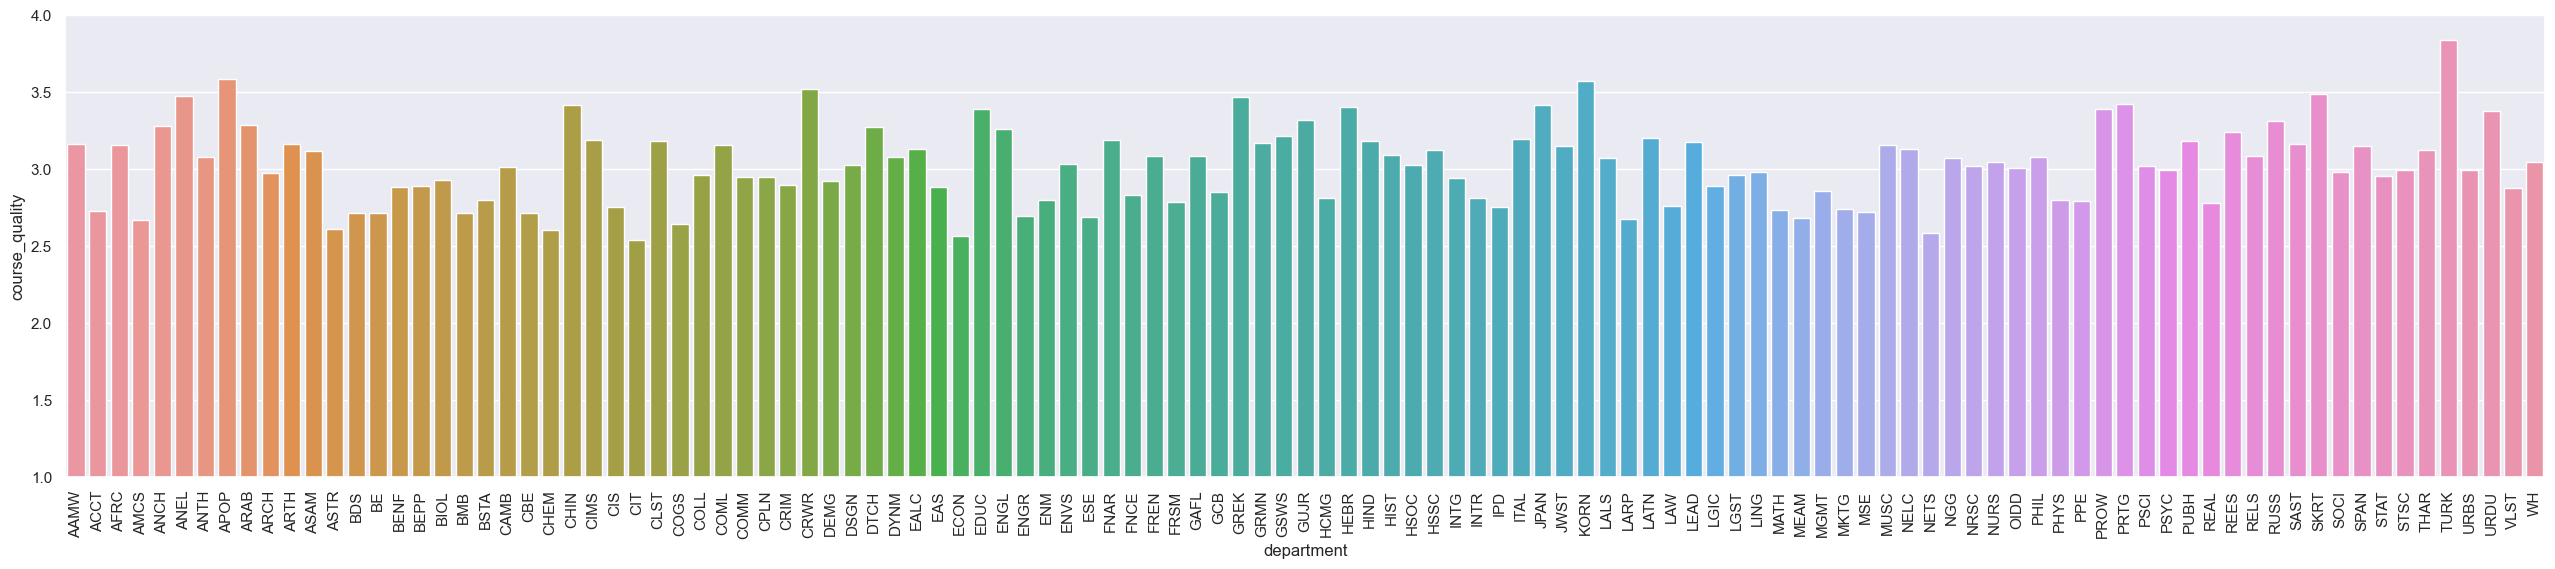

In [88]:
import seaborn as sns

counts = courses_df['department'].value_counts()
filtered_df = courses_df[~courses_df['department'].isin(counts[counts < 5].index)]
data = filtered_df.groupby('department', as_index=False).mean(numeric_only=True)
sns.set(rc={'figure.figsize':(32,6)})
axis = sns.barplot(x='department', y='course_quality', data=data)
axis.set(ylim=(1, 4))
for item in axis.get_xticklabels():
    item.set_rotation(90)

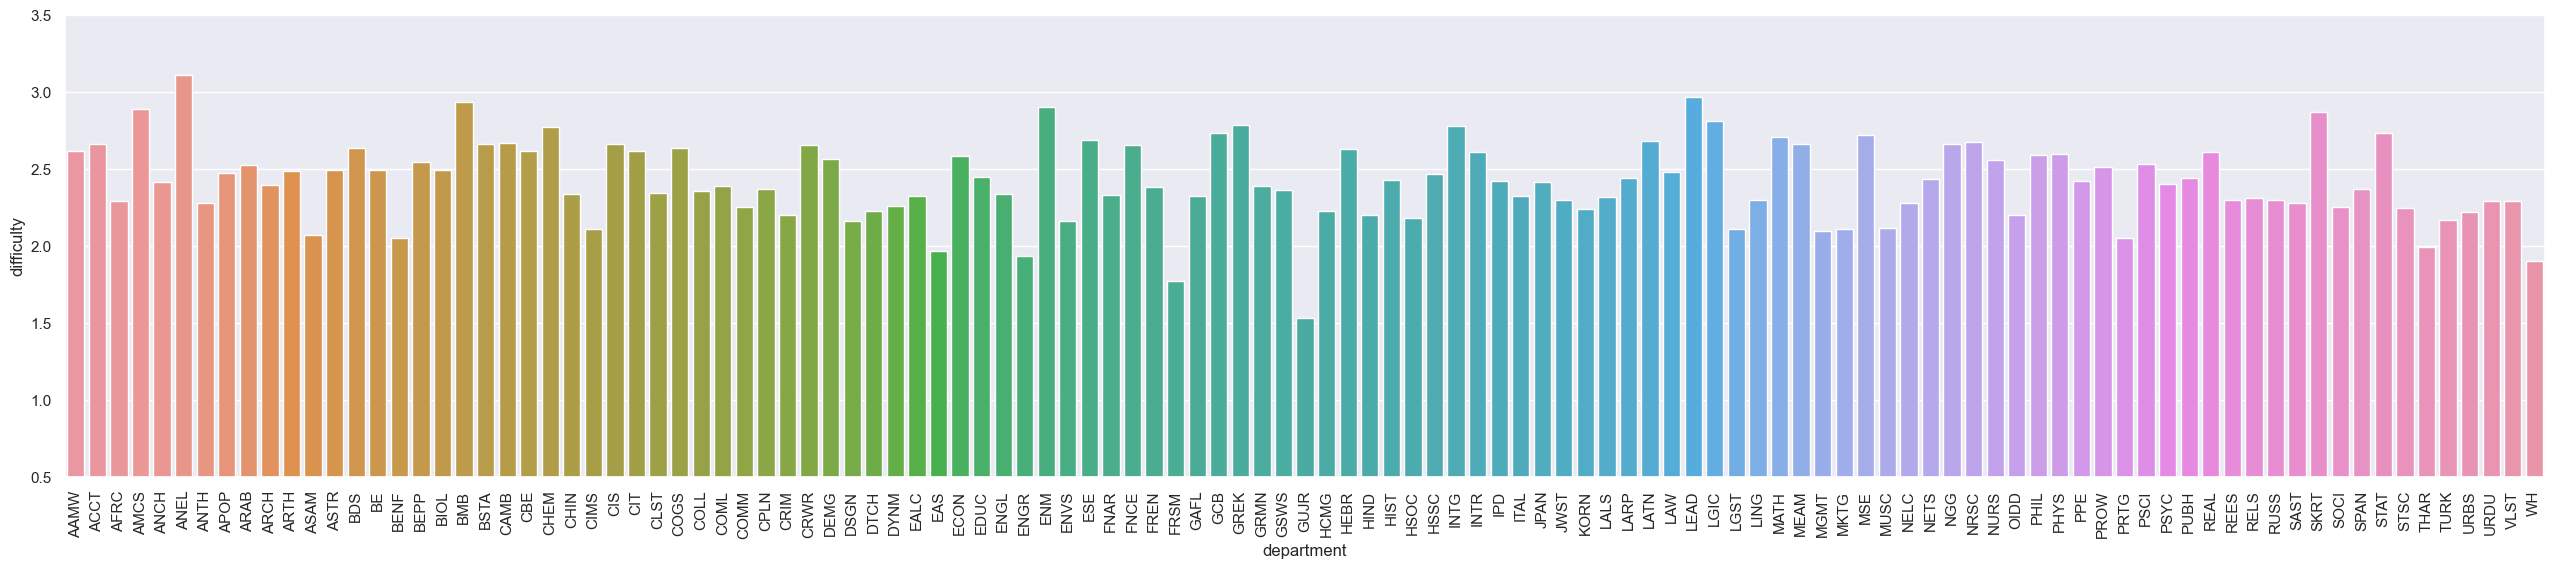

In [91]:
sns.set(rc={'figure.figsize':(32,6)})
axis = sns.barplot(x='department', y='difficulty', data=data)
axis.set(ylim=(0.5, 3.5))
for item in axis.get_xticklabels():
    item.set_rotation(90)

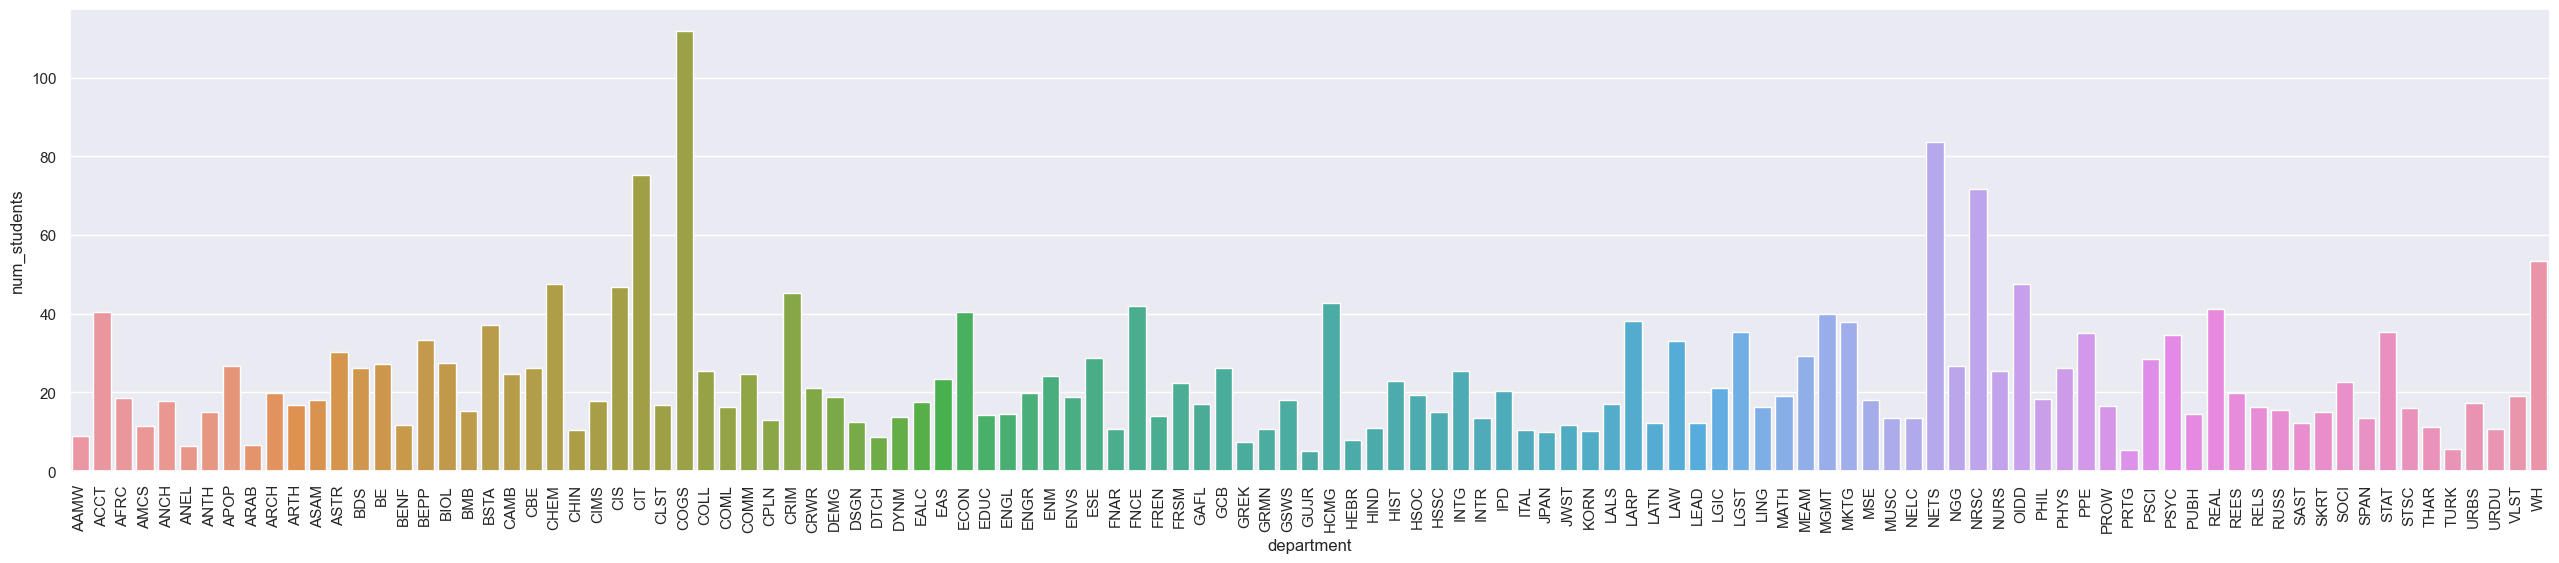

In [92]:
sns.set(rc={'figure.figsize':(32,6)})
axis = sns.barplot(x='department', y='num_students', data=data)
for item in axis.get_xticklabels():
    item.set_rotation(90)

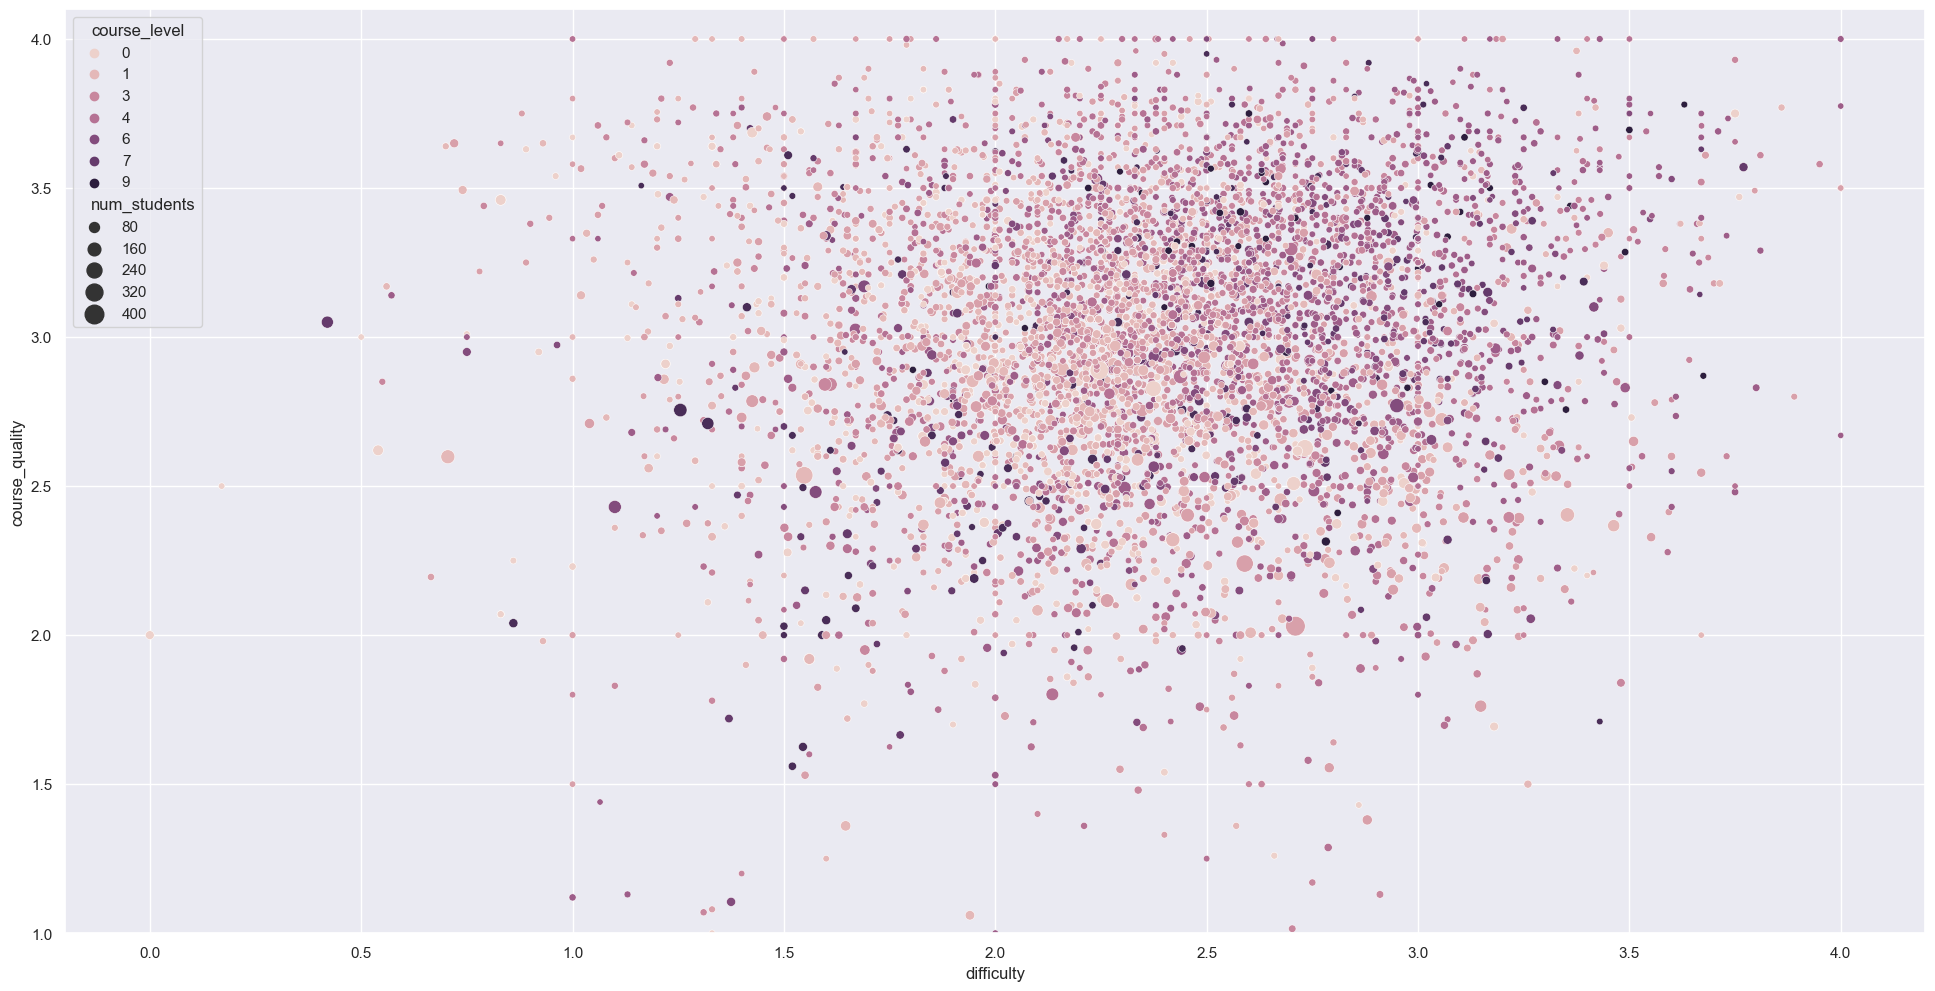

In [118]:
sns.set(rc={'figure.figsize':(24,12)})
axis = sns.scatterplot(data=courses_df, x="difficulty", y="course_quality", hue="course_level", size="num_students", sizes=(20, 200))
axis.set(ylim=(1.0, 4.1))
plt.show()

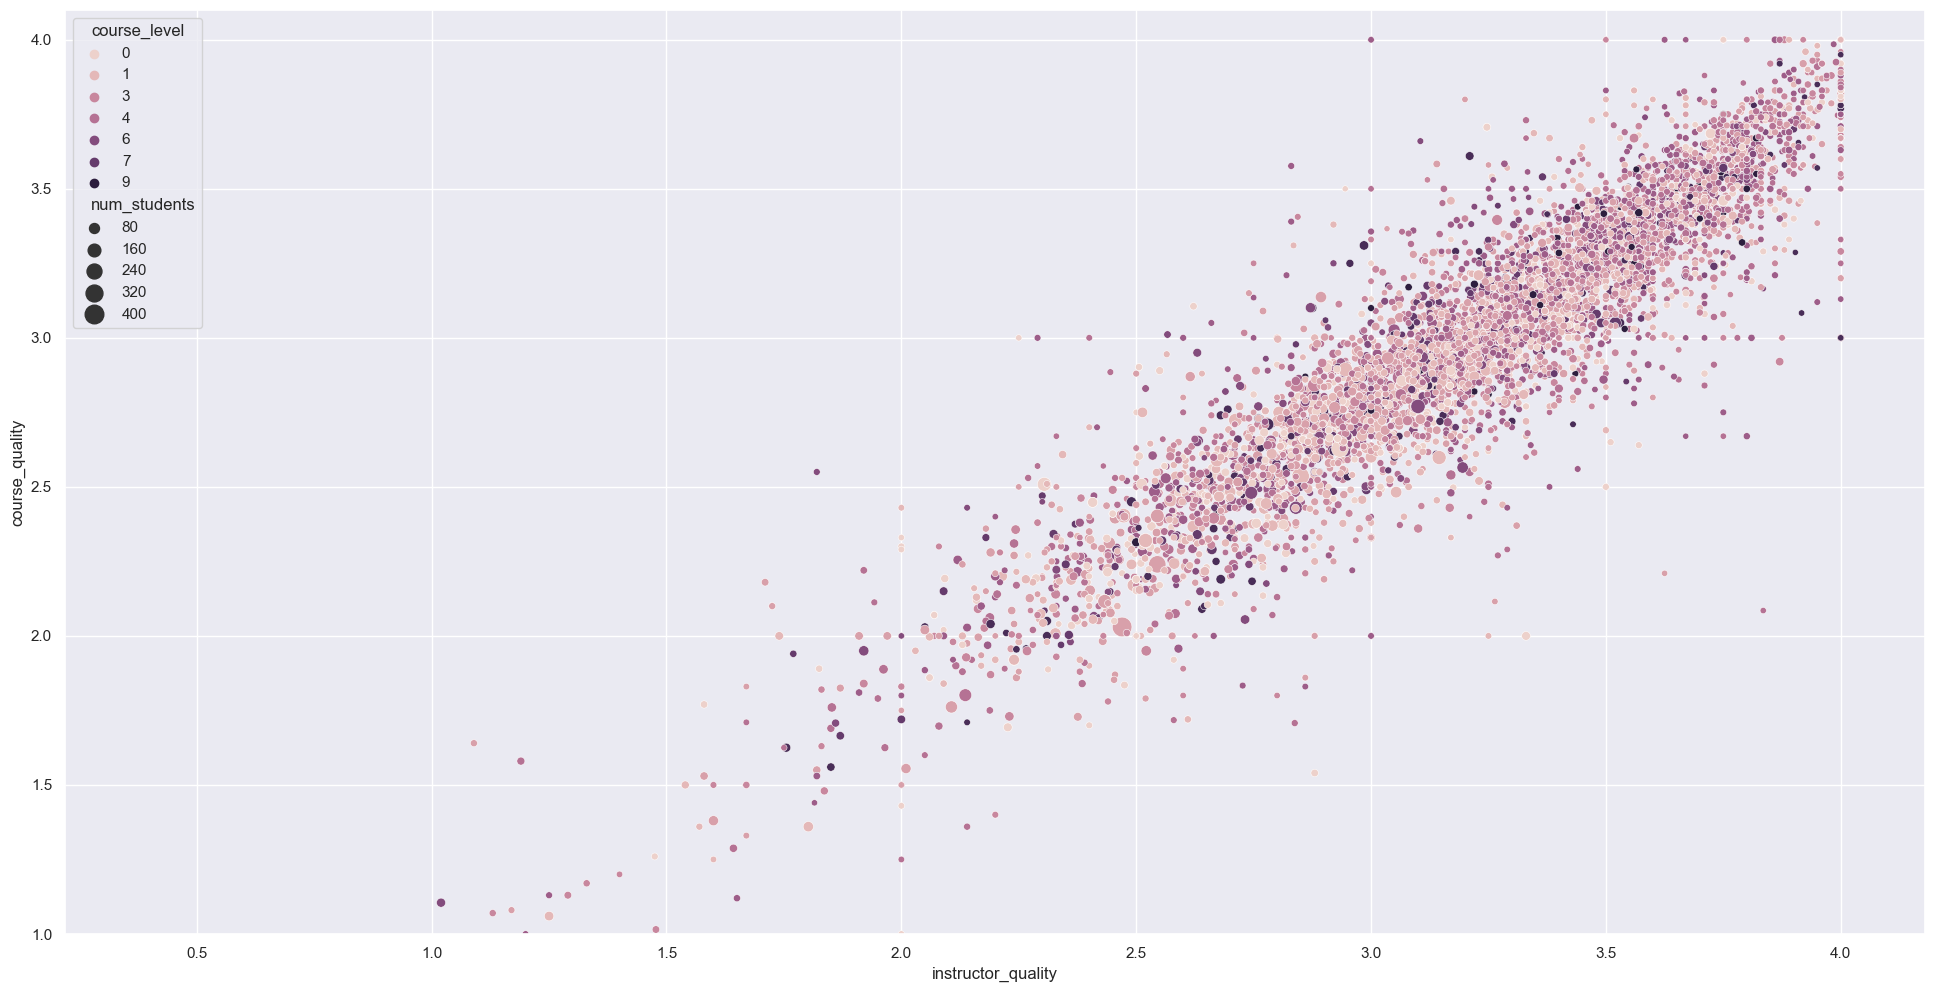

In [122]:
sns.set(rc={'figure.figsize':(24,12)})
axis = sns.scatterplot(data=courses_df, x="instructor_quality", y="course_quality", hue="course_level", size="num_students", sizes=(20, 200))
axis.set(ylim=(1.0, 4.1))
plt.show()

## Regression Models

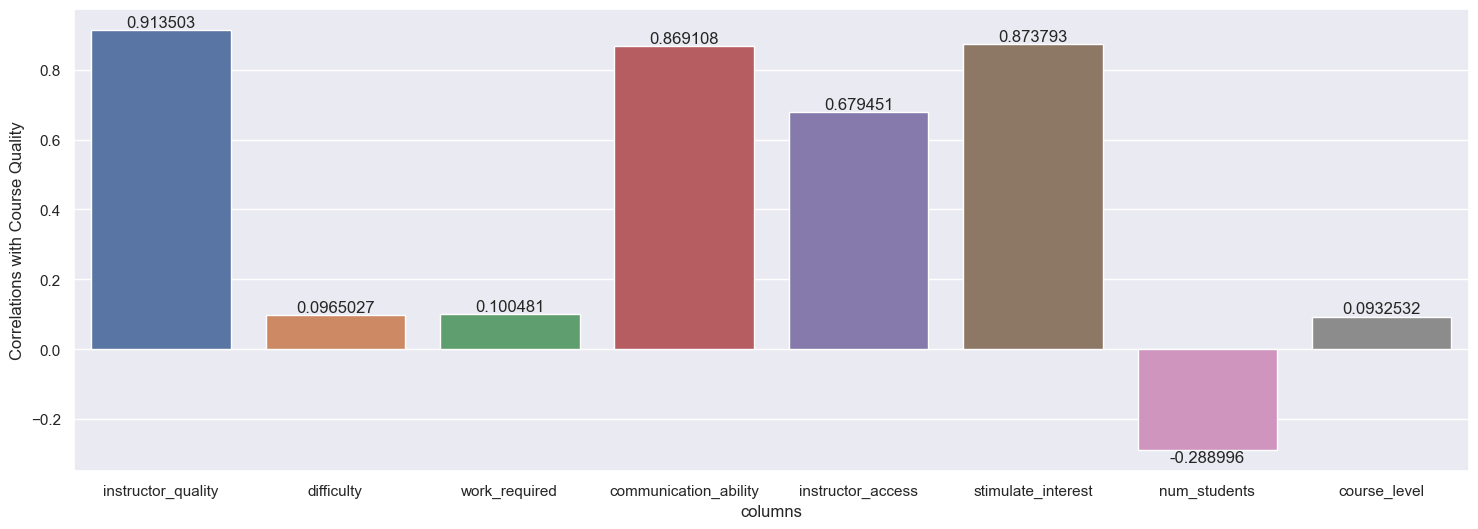

In [188]:
from scipy.stats import pearsonr

correlations = []
columns = []

def get_correlation(x, y):
  corr, _ = pearsonr(x, y)
  return corr

for col in courses_df.columns:
  if col not in ['course_quality', 'code', 'department']:
    corr = get_correlation(courses_df[col], courses_df['course_quality'])
    correlations.append(corr)
    columns.append(col)

data = pd.DataFrame({'columns': columns, 'correlations': correlations})
sns.set(rc={'figure.figsize':(18,6)})
axis = sns.barplot(x='columns', y='correlations', data=data)
axis.set(ylabel='Correlations with Course Quality')
axis.bar_label(axis.containers[0])
plt.show()

In [200]:
from sklearn.linear_model import LinearRegression

dependent_cols = ['difficulty', 'work_required', 'communication_ability', 'instructor_access', 'stimulate_interest', 'num_students', 'course_level']
X = courses_df[dependent_cols]
y = courses_df['course_quality']
reg = LinearRegression().fit(X, y)
print('Linear regression score: ', reg.score(X, y))
for i, col in enumerate(dependent_cols):
  print(f'Coefficient for {col}: {reg.coef_[i]:.3f}')

Linear regression score:  0.8142831371979024
Coefficient for difficulty: 0.063
Coefficient for work_required: -0.007
Coefficient for communication_ability: 0.428
Coefficient for instructor_access: 0.083
Coefficient for stimulate_interest: 0.411
Coefficient for num_students: -0.000
Coefficient for course_level: 0.000


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
print('Linear regression score: ', reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
print('Mean squared error from Linear Regression model: ', mean_squared_error(y_test, y_pred))

Linear regression score:  0.8097163470333262
Mean squared error from Linear Regression model:  0.03828873017297705


In [194]:
# convert department (categorical data) into numerical data
courses_df['departments_num'] = courses_df['department'].astype('category').cat.codes

In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dependent_cols = ['difficulty', 'instructor_quality', 'work_required', 'communication_ability', 'instructor_access', 'stimulate_interest', 'num_students', 'course_level', 'departments_num']
X = courses_df[dependent_cols]
y = courses_df['course_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = RandomForestRegressor(max_depth=20, random_state=0)
reg.fit(X_train, y_train)
print('Regression score for Random Forest model: ', reg.score(X_train, y_train))

y_pred = reg.predict(X_test)
print('Mean squared error from Random Forest model: ', mean_squared_error(y_test, y_pred))

Regression score for Random Forest model:  0.9831618737512626
Mean squared error from Random Forest model:  0.019329052846420253


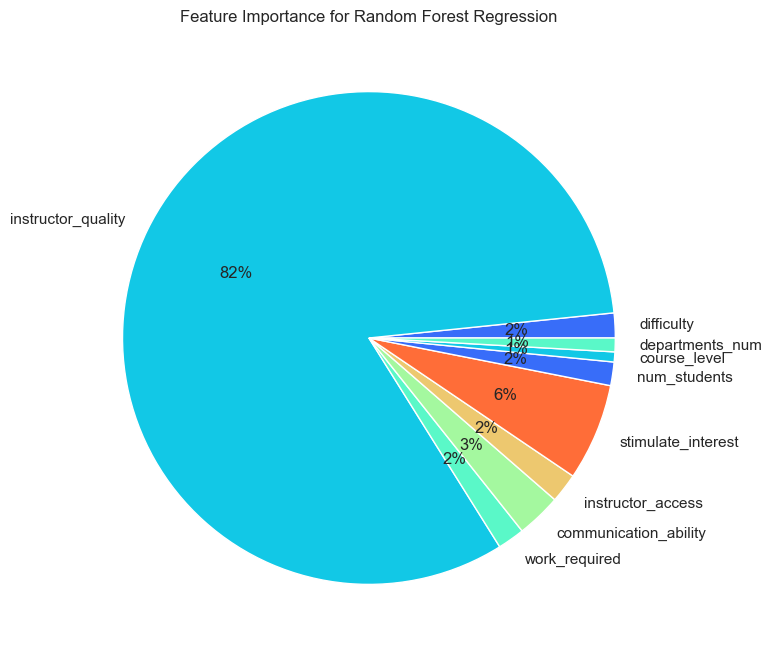

In [199]:
data = reg.feature_importances_
keys = dependent_cols

plt.figure(figsize=(8, 8))
plt.title('Feature Importance for Random Forest Regression')
palette_color = sns.color_palette('rainbow')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()